# Trade-offs

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [3]:
pal_c = sns.color_palette("tab10")

In [4]:
pal = sns.color_palette("Paired", 12)
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4], "gradcam": pal[5], "occlusion":pal[6], 
              "basic_gnnexplainer": pal[7], "gnnexplainer": pal[8], 
              "pgmexplainer":pal[9], "subgraphx": pal[10], "pgexplainer": pal[11]}


In [5]:
sns.set_context("notebook", rc={"legend.fontsize":11, "legend.title_fontsize":11, 
                                "axes.titlesize":12,"axes.labelsize":12,
                               "xtick.labelsize" : 12, "ytick.labelsize" : 10, "xlabel.rotation": 60})


## Real world dataset

In [6]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/real/topk'

jsonpath = f'/cluster/home/kamara/Explain/configs/real/topk/config_real_topk_1expe.json'
ranges = get_param_ranges(jsonpath)

df_res = pd.read_csv(os.path.join(dir, f'nc_real_topk_1expe.csv'), index_col = 0)
res = df_res.groupby(by=['dataset', 'topk', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()

In [7]:
def explainer_type(row):
    if row['explainer_name'] in ['basic_gnnexplainer', 'gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx', 'pgexplainer'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa', 'ig', 'gradcam'] :
      return('gradient')
    return('baseline')

df_res['type'] = df_res.apply(lambda row: explainer_type(row), axis=1)

In [8]:
df_res["1-fidelity_acc-"] = 1- df_res["fidelity_acc-"]
df_res["1-fidelity_prob-"] = 1- df_res["fidelity_prob-"]
df_res['charact_prob'] = 2 * df_res['fidelity_prob+'] * (1-df_res['fidelity_prob-'])/ (df_res['fidelity_prob+']  + 1-df_res['fidelity_prob-'])
df_res['charact_acc'] = 2 * df_res['fidelity_acc+'] * (1-df_res['fidelity_acc-'])/ (df_res['fidelity_acc+']  + 1-df_res['fidelity_acc-'])


In [9]:
df_res["1-fidelity_gnn_acc-"] = 1- df_res["fidelity_gnn_acc-"]
df_res["1-fidelity_gnn_prob-"] = 1- df_res["fidelity_gnn_prob-"]
df_res['charact_gnn_prob'] = 2 * df_res['fidelity_gnn_prob+'] * (1-df_res['fidelity_gnn_prob-'])/ (df_res['fidelity_gnn_prob+']  + 1-df_res['fidelity_gnn_prob-'])
df_res['charact_gnn_acc'] = 2 * df_res['fidelity_gnn_acc+'] * (1-df_res['fidelity_gnn_acc-'])/ (df_res['fidelity_gnn_acc+']  + 1-df_res['fidelity_gnn_acc-'])


In [10]:
df_res = df_res.reset_index()
df_res = df_res[df_res.explainer_name!="pgexplainer"]
df_res = df_res[df_res.dataset!="texas"]
df_res

,dataset,true_label_as_target,hard_mask,topk,explainer_name,num_test_x,fidelity_acc+,fidelity_acc-,fidelity_prob+,fidelity_prob-,...,number_of_edges,type,1-fidelity_acc-,1-fidelity_prob-,charact_prob,charact_acc,1-fidelity_gnn_acc-,1-fidelity_gnn_prob-,charact_gnn_prob,charact_gnn_acc
0,actor,False,False,1.0,basic_gnnexplainer,100.0,-1.00,-1.00,-1.000000,-1.000000,...,60918.0,pertubation,2.00,2.000000,-4.000000,-4.000000,0.58,0.886779,0.004993,0.000000
1,actor,False,False,1.0,distance,100.0,-1.00,-1.00,-1.000000,-1.000000,...,60918.0,baseline,2.00,2.000000,-4.000000,-4.000000,0.61,0.893534,0.033239,0.125588
2,actor,False,False,1.0,gnnexplainer,100.0,-1.00,-1.00,-1.000000,-1.000000,...,60918.0,pertubation,2.00,2.000000,-4.000000,-4.000000,0.59,0.901947,0.137778,0.497451
3,actor,False,False,1.0,gradcam,100.0,-1.00,-1.00,-1.000000,-1.000000,...,60918.0,gradient,2.00,2.000000,-4.000000,-4.000000,0.62,0.917929,0.071679,0.254359
4,actor,False,False,1.0,ig,100.0,-1.00,-1.00,-1.000000,-1.000000,...,60918.0,gradient,2.00,2.000000,-4.000000,-4.000000,0.50,0.861441,0.287859,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,wisconsin,True,True,100.0,pagerank,100.0,0.70,0.09,0.117450,-0.001679,...,1151.0,baseline,0.91,1.001679,0.210247,0.791304,2.00,2.000000,-4.000000,-4.000000
3636,wisconsin,True,True,100.0,pgmexplainer,100.0,0.63,0.13,0.108370,-0.005719,...,1151.0,pertubation,0.87,1.005719,0.195658,0.730800,2.00,2.000000,-4.000000,-4.000000
3637,wisconsin,True,True,100.0,random,100.0,0.20,0.55,-0.008910,0.088731,...,1151.0,baseline,0.45,0.911269,-0.017996,0.276923,2.00,2.000000,-4.000000,-4.000000
3638,wisconsin,True,True,100.0,sa,100.0,0.70,0.45,0.140986,0.066443,...,1151.0,gradient,0.55,0.933557,0.244976,0.616000,2.00,2.000000,-4.000000,-4.000000


In [11]:
df_res.columns

Index(['dataset', 'true_label_as_target', 'hard_mask', 'topk',
       'explainer_name', 'num_test_x', 'fidelity_acc+', 'fidelity_acc-',
       'fidelity_prob+', 'fidelity_prob-', 'fidelity_gnn_acc+',
       'fidelity_gnn_acc-', 'fidelity_gnn_prob+', 'fidelity_gnn_prob-',
       'num_test_init', 'mask_size_init', 'mask_entropy_init', 'max_avg_init',
       'num_test_transf', 'mask_size_transf', 'mask_entropy_transf',
       'max_avg_transf', 'num_test_y', 'time', 'number_of_edges', 'type',
       '1-fidelity_acc-', '1-fidelity_prob-', 'charact_prob', 'charact_acc',
       '1-fidelity_gnn_acc-', '1-fidelity_gnn_prob-', 'charact_gnn_prob',
       'charact_gnn_acc'],
      dtype='object')

In [12]:
df_res.loc[df_res['true_label_as_target']==False, 'charact_prob'] = df_res['charact_gnn_prob']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_prob+'] = df_res['fidelity_gnn_prob+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_prob-"] = df_res["1-fidelity_gnn_prob-"]

df_res.loc[df_res['true_label_as_target']==False, 'charact_acc'] = df_res['charact_gnn_acc']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_acc+'] = df_res['fidelity_gnn_acc+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_acc-"] = df_res["1-fidelity_gnn_acc-"]


In [13]:
datasets = [
      "cora",
      "pubmed",
      "citeseer",
      "cornell",
      #"texas",
      "wisconsin",
      "actor",
      "chameleon",
    "squirrel",
    "facebook"
    ]

## Rank methods

In [14]:
# choose size of explanation
topk_val = 10

In [15]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]
dfc = pd.pivot_table(dfc, values=["charact_acc"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

charact_acc                                          \
dataset                  actor chameleon  citeseer      cora   cornell   
explainer_name                                                           
sa                    0.765873  0.637431  0.923529  0.702505  0.780476   
occlusion             0.539394  0.492625  0.663063  0.680199  0.535420   
ig                    0.530175  0.410101  0.789424  0.485987  0.758359   
gradcam               0.440413  0.416833  0.543151  0.555103  0.295991   
gnnexplainer          0.364257  0.434249  0.609674  0.513067  0.525032   
pagerank              0.394734  0.390042  0.684590  0.542276  0.246523   
pgmexplainer          0.376368  0.346595  0.678322  0.492439  0.294990   
distance              0.413764  0.351504  0.447184  0.302329  0.240742   
subgraphx             0.388794  0.265152  0.357419  0.225594  0.183156   
basic_gnnexplainer    0.278040  0.253508  0.378819  0.218576  0.171745   
random                0.403645  0.439567  0.127399  0.114990  0.096576   

                                                           mean_rank  \
dataset             facebook    pubmed  squirrel wisconsin             
explainer_name                                                         
sa                  0.602952  0.823431  0.706300  0.544120  0.720735   
occlusion           0.445118  0.666683  0.532269  0.728778  0.587061   
ig                  0.482286  0.348801  0.648077  0.466591  0.546644   
gradcam             0.403585  0.549943  0.445390  0.646398  0.477423   
gnnexplainer        0.374055  0.432500  0.434205  0.560038  0.471897   
pagerank            0.344573  0.615125  0.360859  0.545370  0.458232   
pgmexplainer        0.268834  0.480722  0.354625  0.485123  0.419780   
distance            0.142945  0.342937  0.340554  0.359404  0.326818   
subgraphx           0.092593  0.128129       NaN  0.268087  0.238615   
basic_gnnexplainer  0.078649  0.171459  0.249344  0.182798  0.220326   
random              0.096769  0.119783  0.458433  0.115889  0.219228   

                   final_rank  
dataset                        
explainer_name                 
sa                        1.0  
occlusion                 2.0  
ig                        3.0  
gradcam                   4.0  
gnnexplainer              5.0  
pagerank                  6.0  
pgmexplainer              7.0  
distance                  8.0  
subgraphx                 9.0  
basic_gnnexplainer       10.0  
random                   11.0

In [17]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]

dfc['Characterization'] = dfc.groupby('dataset')['charact_acc'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Characterization'])

dfc = pd.pivot_table(dfc, values=['Characterization'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Characterization                                            \
dataset                       actor chameleon citeseer  cora cornell facebook   
explainer_name                                                                  
sa                              1.0       1.0      1.0   1.0     1.0      1.0   
occlusion                       2.0       2.0      5.0   2.0     3.0      3.0   
ig                              3.0       6.0      2.0   7.0     2.0      2.0   
gradcam                         4.0       5.0      7.0   3.0     5.0      4.0   
pagerank                        7.0       7.0      3.0   4.0     7.0      6.0   
gnnexplainer                   10.0       4.0      6.0   5.0     4.0      5.0   
pgmexplainer                    9.0       9.0      4.0   6.0     6.0      7.0   
distance                        5.0       8.0      8.0   8.0     8.0      8.0   
random                          6.0       3.0     11.0  11.0    11.0      9.0   
subgraphx                       8.0      10.0     10.0   9.0     9.0     10.0   
basic_gnnexplainer             11.0      11.0      9.0  10.0    10.0     11.0   

                                              mean_rank final_rank  
dataset            pubmed squirrel wisconsin                        
explainer_name                                                      
sa                    1.0      1.0       5.0   1.444444        1.0  
occlusion             2.0      3.0       1.0   2.555556        2.0  
ig                    7.0      2.0       7.0   4.222222        3.0  
gradcam               4.0      5.0       2.0   4.333333        4.0  
pagerank              3.0      7.0       4.0   5.333333        5.0  
gnnexplainer          6.0      6.0       3.0   5.444444        6.0  
pgmexplainer          5.0      8.0       6.0   6.666667        7.0  
distance              8.0      9.0       8.0   7.777778        8.0  
random               11.0      4.0      11.0   8.555556        9.0  
subgraphx            10.0      NaN       9.0   9.375000       10.0  
basic_gnnexplainer    9.0     10.0      10.0  10.111111       11.0

#### Counterfactual explanations

In [18]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'fidelity_acc+']]

dfc = pd.pivot_table(dfc, values=['fidelity_acc+'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

fidelity_acc+                                       \
dataset                    actor chameleon citeseer    cora   cornell   
explainer_name                                                          
sa                      0.650000   0.69625   0.9000  0.8625  0.782500   
ig                      0.475000   0.55000   0.8500  0.7875  0.667500   
occlusion               0.432500   0.44250   0.5450  0.5900  0.385833   
gnnexplainer            0.255000   0.35750   0.5475  0.4575  0.370000   
gradcam                 0.320000   0.33750   0.4300  0.4600  0.177500   
pagerank                0.277500   0.30000   0.5550  0.4375  0.142500   
pgmexplainer            0.282500   0.28750   0.5400  0.3475  0.175000   
distance                0.307500   0.31000   0.3175  0.1950  0.140000   
random                  0.310000   0.47000   0.1075  0.0925  0.052500   
basic_gnnexplainer      0.220000   0.26500   0.2800  0.1475  0.097500   
subgraphx               0.308333   0.22500   0.2325  0.1350  0.102500   

                                                           mean_rank  \
dataset             facebook    pubmed  squirrel wisconsin             
explainer_name                                                         
sa                  0.920000  0.800000  0.675000  0.699375  0.776181   
ig                  0.727500  0.250000  0.650000  0.590000  0.616389   
occlusion           0.362500  0.547500  0.469828  0.627500  0.489240   
gnnexplainer        0.277500  0.340000  0.350000  0.625000  0.397778   
gradcam             0.285000  0.412500  0.375000  0.557500  0.372778   
pagerank            0.242500  0.482500  0.297500  0.467500  0.355833   
pgmexplainer        0.170000  0.340000  0.290000  0.345000  0.308611   
distance            0.085000  0.225000  0.290000  0.242500  0.234722   
random              0.070000  0.075000  0.422500  0.157500  0.195278   
basic_gnnexplainer  0.052500  0.107500  0.227500  0.150000  0.171944   
subgraphx           0.055556  0.070801       NaN  0.165000  0.161836   

                   final_rank  
dataset                        
explainer_name                 
sa                        1.0  
ig                        2.0  
occlusion                 3.0  
gnnexplainer              4.0  
gradcam                   5.0  
pagerank                  6.0  
pgmexplainer              7.0  
distance                  8.0  
random                    9.0  
basic_gnnexplainer       10.0  
subgraphx                11.0

In [19]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "fidelity_acc+"]]

dfc['Counterfactual'] = dfc.groupby('dataset')['fidelity_acc+'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Counterfactual'])

dfc = pd.pivot_table(dfc, values=["Counterfactual"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Counterfactual                                            \
dataset                     actor chameleon citeseer  cora cornell facebook   
explainer_name                                                                
sa                            1.0       1.0      1.0   1.0     1.0      1.0   
ig                            2.0       2.0      2.0   2.0     2.0      2.0   
occlusion                     3.0       4.0      5.0   3.0     3.0      3.0   
gradcam                       4.0       6.0      7.0   4.0     5.0      4.0   
gnnexplainer                 10.0       5.0      4.0   5.0     4.0      5.0   
pagerank                      9.0       8.0      3.0   6.0     7.0      6.0   
pgmexplainer                  8.0       9.0      6.0   7.0     6.0      7.0   
distance                      7.0       7.0      8.0   8.0     8.0      8.0   
random                        5.0       3.0     11.0  11.0    11.0      9.0   
subgraphx                     6.0      11.0     10.0  10.0     9.0     10.0   
basic_gnnexplainer           11.0      10.0      9.0   9.0    10.0     11.0   

                                              mean_rank final_rank  
dataset            pubmed squirrel wisconsin                        
explainer_name                                                      
sa                    1.0      1.0       1.0   1.000000        1.0  
ig                    7.0      2.0       4.0   2.777778        2.0  
occlusion             2.0      3.0       2.0   3.111111        3.0  
gradcam               4.0      5.0       5.0   4.888889        4.0  
gnnexplainer          5.5      6.0       3.0   5.277778        5.0  
pagerank              3.0      7.0       6.0   6.111111        6.0  
pgmexplainer          5.5      8.5       7.0   7.111111        7.0  
distance              8.0      8.5       8.0   7.833333        8.0  
random               10.0      4.0      10.0   8.222222        9.0  
subgraphx            11.0      NaN       9.0   9.500000       10.0  
basic_gnnexplainer    9.0     10.0      11.0  10.000000       11.0

#### Causal explanations

In [20]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "1-fidelity_acc-"]]

dfc['Causal'] = dfc.groupby('dataset')['1-fidelity_acc-'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Causal'])
dfc = pd.pivot_table(dfc, values=["1-fidelity_acc-"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

1-fidelity_acc-                                      \
dataset                      actor chameleon citeseer    cora  cornell   
explainer_name                                                           
gradcam                   0.790000   0.64000   0.9450  0.9200  0.96250   
pagerank                  0.765000   0.65500   0.9500  0.9025  0.93000   
occlusion                 0.827500   0.59750   0.9475  0.8500  0.93500   
pgmexplainer              0.740000   0.62500   0.9425  0.8600  0.94500   
subgraphx                 0.783333   0.60000   0.8175  0.6975  0.87500   
sa                        0.950000   0.62625   0.9500  0.5950  0.79500   
distance                  0.737500   0.57250   0.8550  0.7450  0.92500   
gnnexplainer              0.755000   0.59250   0.6950  0.6100  0.93500   
ig                        0.650000   0.45000   0.7500  0.3600  0.90125   
basic_gnnexplainer        0.667500   0.47750   0.6450  0.4725  0.88500   
random                    0.673333   0.46000   0.2550  0.1900  0.84000   

                                                          mean_rank final_rank  
dataset            facebook    pubmed  squirrel wisconsin                       
explainer_name                                                                  
gradcam              0.7600  0.845000  0.657500    0.8750  0.821667        1.0  
pagerank             0.7350  0.850000  0.627500    0.8150  0.803333        2.0  
occlusion            0.6100  0.855000  0.663793    0.9100  0.799588        3.0  
pgmexplainer         0.6475  0.827500  0.622500    0.8475  0.784167        4.0  
subgraphx            0.5000  0.688963       NaN    0.7900  0.719037        5.0  
sa                   0.4500  0.850000  0.750000    0.4700  0.715139        6.0  
distance             0.4650  0.735000  0.595000    0.7625  0.710278        7.0  
gnnexplainer         0.5900  0.620000  0.657500    0.5675  0.669167        8.0  
ig                   0.3625  0.750000  0.650000    0.4075  0.586806        9.0  
basic_gnnexplainer   0.2225  0.460000  0.570000    0.3050  0.522778       10.0  
random               0.1800  0.305000  0.565000    0.1700  0.404259       11.0

In [21]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "1-fidelity_acc-"]]

dfc['Causal'] = dfc.groupby('dataset')['1-fidelity_acc-'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Causal'])

dfc = pd.pivot_table(dfc, values=["Causal"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Causal                                                   \
dataset             actor chameleon citeseer  cora cornell facebook pubmed   
explainer_name                                                               
gradcam               3.0       2.0      4.0   1.0     1.0      1.0    4.0   
occlusion             2.0       6.0      3.0   4.0     3.5      4.0    1.0   
pagerank              5.0       1.0      1.5   2.0     5.0      2.0    3.0   
pgmexplainer          7.0       4.0      5.0   3.0     2.0      3.0    5.0   
sa                    1.0       3.0      1.5   8.0    11.0      8.0    2.0   
subgraphx             4.0       5.0      7.0   6.0     9.0      6.0    8.0   
gnnexplainer          6.0       7.0      9.0   7.0     3.5      5.0    9.0   
distance              8.0       8.0      6.0   5.0     6.0      7.0    7.0   
ig                   11.0      11.0      8.0  10.0     7.0      9.0    6.0   
basic_gnnexplainer   10.0       9.0     10.0   9.0     8.0     10.0   10.0   
random                9.0      10.0     11.0  11.0    10.0     11.0   11.0   

                                       mean_rank final_rank  
dataset            squirrel wisconsin                        
explainer_name                                               
gradcam                 3.5       2.0   2.388889        1.0  
occlusion               2.0       1.0   2.944444        2.0  
pagerank                6.0       4.0   3.277778        3.0  
pgmexplainer            7.0       3.0   4.333333        4.0  
sa                      1.0       8.0   4.833333        5.0  
subgraphx               NaN       5.0   6.250000        6.0  
gnnexplainer            3.5       7.0   6.333333        7.0  
distance                8.0       6.0   6.777778        8.0  
ig                      5.0       9.0   8.444444        9.0  
basic_gnnexplainer      9.0      10.0   9.444444       10.0  
random                 10.0      11.0  10.444444       11.0

#### Phenomenon

In [22]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==True)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'charact_acc']]

dfc = pd.pivot_table(dfc, values=['charact_acc'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

charact_acc                                          \
dataset                  actor chameleon  citeseer      cora   cornell   
explainer_name                                                           
sa                    0.642857  0.584672  0.847059  0.656023  0.694574   
ig                    0.464545  0.509091  0.773333  0.547569  0.665084   
occlusion             0.357279  0.420807  0.544573  0.587173  0.446990   
pagerank              0.341113  0.325436  0.610775  0.502984  0.235900   
gradcam               0.333273  0.339523  0.434398  0.479438  0.234673   
gnnexplainer          0.235624  0.364407  0.457921  0.458448  0.433109   
pgmexplainer          0.286487  0.296263  0.581316  0.439867  0.273874   
distance              0.337801  0.309242  0.390189  0.265649  0.241287   
random                0.342826  0.434351  0.125731  0.123088  0.083002   
subgraphx             0.350794  0.163636  0.305112  0.205411  0.167559   
basic_gnnexplainer    0.204280  0.237602  0.332279  0.203591  0.176883   

                                                           mean_rank  \
dataset             facebook    pubmed  squirrel wisconsin             
explainer_name                                                         
sa                  0.594353  0.773333  0.665934  0.569443  0.669805   
ig                  0.498328  0.342045  0.623077  0.492377  0.546161   
occlusion           0.429218  0.608465  0.449716  0.615801  0.495558   
pagerank            0.342376  0.607519  0.331463  0.493879  0.421272   
gradcam             0.386638  0.499268  0.375477  0.586935  0.407736   
gnnexplainer        0.362807  0.382199  0.349359  0.490690  0.392729   
pgmexplainer        0.263382  0.467179  0.327804  0.418880  0.372784   
distance            0.143316  0.337382  0.310345  0.327978  0.295910   
random              0.100000  0.107632  0.423496  0.188044  0.214241   
subgraphx           0.092593  0.119055       NaN  0.229233  0.204174   
basic_gnnexplainer  0.083087  0.128896  0.212929  0.205777  0.198369   

                   final_rank  
dataset                        
explainer_name                 
sa                        1.0  
ig                        2.0  
occlusion                 3.0  
pagerank                  4.0  
gradcam                   5.0  
gnnexplainer              6.0  
pgmexplainer              7.0  
distance                  8.0  
random                    9.0  
subgraphx                10.0  
basic_gnnexplainer       11.0

In [23]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==True)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]

dfc['Phenomenon'] = dfc.groupby('dataset')['charact_acc'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Phenomenon'])

dfc = pd.pivot_table(dfc, values=['Phenomenon'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Phenomenon                                            \
dataset                 actor chameleon citeseer  cora cornell facebook   
explainer_name                                                            
sa                        1.0       1.0      1.0   1.0     1.0      1.0   
occlusion                 3.0       4.0      5.0   2.0     3.0      3.0   
ig                        2.0       2.0      2.0   3.0     2.0      2.0   
pagerank                  6.0       7.0      3.0   4.0     7.0      6.0   
gradcam                   8.0       6.0      7.0   5.0     8.0      4.0   
gnnexplainer             10.0       5.0      6.0   6.0     4.0      5.0   
pgmexplainer              9.0       9.0      4.0   7.0     5.0      7.0   
distance                  7.0       8.0      8.0   8.0     6.0      8.0   
random                    5.0       3.0     11.0  11.0    11.0      9.0   
subgraphx                 4.0      11.0     10.0   9.0    10.0     10.0   
basic_gnnexplainer       11.0      10.0      9.0  10.0     9.0     11.0   

                                             mean_rank final_rank  
dataset            pubmed squirrel wisconsin                       
explainer_name                                                     
sa                    1.0      1.0       3.0  1.222222        1.0  
occlusion             2.0      3.0       1.0  2.888889        2.0  
ig                    7.0      2.0       5.0  3.000000        3.0  
pagerank              3.0      7.0       4.0  5.222222        4.0  
gradcam               4.0      5.0       2.0  5.444444        5.0  
gnnexplainer          6.0      6.0       6.0  6.000000        6.0  
pgmexplainer          5.0      8.0       7.0  6.777778        7.0  
distance              8.0      9.0       8.0  7.777778        8.0  
random               11.0      4.0      11.0  8.444444        9.0  
subgraphx            10.0      NaN       9.0  9.125000       10.0  
basic_gnnexplainer    9.0     10.0      10.0  9.888889       11.0

#### Model

In [24]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==False)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'charact_acc']]

dfc = pd.pivot_table(dfc, values=['charact_acc'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

charact_acc                                          \
dataset                  actor chameleon  citeseer      cora   cornell   
explainer_name                                                           
sa                    0.888889  0.690190  1.000000  0.748987  0.866379   
occlusion             0.721509  0.564443  0.781552  0.773226  0.623851   
gnnexplainer          0.492891  0.504091  0.761427  0.567686  0.616956   
ig                    0.595804  0.311111  0.805515  0.424406  0.851634   
gradcam               0.547553  0.494143  0.651905  0.630768  0.357310   
pagerank              0.448355  0.454648  0.758406  0.581568  0.257146   
pgmexplainer          0.466249  0.396928  0.775327  0.545010  0.316106   
distance              0.489728  0.393765  0.504179  0.339008  0.240196   
subgraphx             0.426794  0.366667  0.409726  0.245776  0.198753   
basic_gnnexplainer    0.351800  0.269415  0.425358  0.233561  0.166607   
random                0.525283  0.444782  0.129067  0.106891  0.110149   

                                                           mean_rank  \
dataset             facebook    pubmed  squirrel wisconsin             
explainer_name                                                         
sa                  0.611550  0.873529  0.746667  0.518797  0.771665   
occlusion           0.461017  0.724902  0.614823  0.841755  0.678564   
gnnexplainer        0.385302  0.482800  0.519050  0.629385  0.551065   
ig                  0.466244  0.355556  0.673077  0.440805  0.547128   
gradcam             0.420533  0.600619  0.515303  0.705861  0.547111   
pagerank            0.346769  0.622730  0.390254  0.596862  0.495193   
pgmexplainer        0.274286  0.494264  0.381446  0.551366  0.466776   
distance            0.142574  0.348492  0.370764  0.390830  0.357726   
subgraphx                NaN  0.137202       NaN  0.306940  0.298837   
basic_gnnexplainer  0.074211  0.214022  0.285759  0.159819  0.242284   
random              0.093538  0.131933  0.493370  0.043733  0.230972   

                   final_rank  
dataset                        
explainer_name                 
sa                        1.0  
occlusion                 2.0  
gnnexplainer              3.0  
ig                        4.0  
gradcam                   5.0  
pagerank                  6.0  
pgmexplainer              7.0  
distance                  8.0  
subgraphx                 9.0  
basic_gnnexplainer       10.0  
random                   11.0

In [25]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==False)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]

dfc["Model"] = dfc.groupby('dataset')['charact_acc'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', "Model"])

dfc = pd.pivot_table(dfc, values=["Model"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Model                                                   \
dataset            actor chameleon citeseer  cora cornell facebook pubmed   
explainer_name                                                              
sa                   1.0       1.0      1.0   2.0     1.0      1.0    1.0   
occlusion            2.0       2.0      3.0   1.0     3.0      3.0    2.0   
gradcam              4.0       4.0      7.0   3.0     5.0      4.0    4.0   
gnnexplainer         6.0       3.0      5.0   5.0     4.0      5.0    6.0   
ig                   3.0      10.0      2.0   7.0     2.0      2.0    7.0   
pagerank             9.0       5.0      6.0   4.0     7.0      6.0    3.0   
pgmexplainer         8.0       7.0      4.0   6.0     6.0      7.0    5.0   
distance             7.0       8.0      8.0   8.0     8.0      8.0    8.0   
random               5.0       6.0     11.0  11.0    11.0      9.0   11.0   
subgraphx           10.0       9.0     10.0   9.0     9.0      NaN   10.0   
basic_gnnexplainer  11.0      11.0      9.0  10.0    10.0     10.0    9.0   

                                       mean_rank final_rank  
dataset            squirrel wisconsin                        
explainer_name                                               
sa                      1.0       6.0   1.666667        1.0  
occlusion               3.0       1.0   2.222222        2.0  
gradcam                 5.0       2.0   4.222222        3.0  
gnnexplainer            4.0       3.0   4.555556        4.0  
ig                      2.0       7.0   4.666667        5.0  
pagerank                7.0       4.0   5.666667        6.0  
pgmexplainer            8.0       5.0   6.222222        7.0  
distance                9.0       8.0   8.000000        8.0  
random                  6.0      11.0   9.000000        9.0  
subgraphx               NaN       9.0   9.428571       10.0  
basic_gnnexplainer     10.0      10.0  10.000000       11.0

## Compare Explainer 1 vs Explainer 2

In [75]:
expl1 = "ig"#"occlusion"#"gradcam"#"gnnexplainer"#"gnnexplainer"#"occlusion"
expl2 = "occlusion"#"pagerank"#"pagerank"#"sa"
title = "Integrated Gradient vs Occlusion"#"GradCAM vs PageRank"#"GNNExplainer vs PageRank"#"Occlusion vs Saliency"
#Always exlp2 - expl1

In [76]:
df_vs = df_res[(df_res.explainer_name==expl1)|(df_res.explainer_name==expl2)].groupby(["explainer_name", "dataset", 'true_label_as_target','hard_mask', 'topk']).mean()
df_vs = df_vs[["charact_acc", "fidelity_acc+", "1-fidelity_acc-", "time"]]
df_vs = df_vs.reset_index()
df_vs


,explainer_name,dataset,true_label_as_target,hard_mask,topk,charact_acc,fidelity_acc+,1-fidelity_acc-,time
0,ig,actor,False,False,1.0,0.583333,0.70,0.50,0.3854
1,ig,actor,False,False,5.0,0.583333,0.70,0.50,0.3854
2,ig,actor,False,False,10.0,0.646154,0.70,0.60,0.3854
3,ig,actor,False,False,15.0,0.646154,0.70,0.60,0.3854
4,ig,actor,False,False,20.0,0.646154,0.70,0.60,0.3854
...,...,...,...,...,...,...,...,...,...
571,occlusion,wisconsin,True,True,15.0,0.741053,0.64,0.88,0.6651
572,occlusion,wisconsin,True,True,20.0,0.741053,0.64,0.88,0.6651
573,occlusion,wisconsin,True,True,25.0,0.737483,0.64,0.87,0.6651
574,occlusion,wisconsin,True,True,50.0,0.741053,0.64,0.88,0.6651


### Trade-off Phenomenon vs Model

In [77]:
#dfs = df_vs[(df_vs.true_label_as_target==True)].groupby(["dataset", "explainer_name"]).mean()
dfs = df_vs.groupby(["true_label_as_target", "dataset", "explainer_name"]).mean()

In [78]:
dfs= dfs.diff().reset_index()
dfs = dfs[dfs.explainer_name==expl2]

In [79]:
dfs = dfs.sort_values(by='charact_acc')

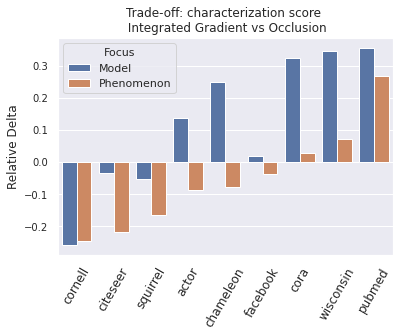

In [80]:
ax = sns.barplot(x="dataset", y="charact_acc", data=dfs, hue = "true_label_as_target")
plt.setp(ax.get_xticklabels(), rotation=60)
ax.set_title(f"Trade-off: characterization score \n {title}")
# title
# check axes and find which is have legend
leg = ax.get_legend()
new_title = 'Focus'
leg.set_title(new_title)
# replace labels
new_labels = ["Model", "Phenomenon"]
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("")
plt.ylabel("Relative Delta")
#plt.savefig('/cluster/home/kamara/Explain/figures/topk/trade-off_charact_k_10_gradcam_vs_pagerank.pdf', bbox_inches='tight')
#plt.savefig('/cluster/home/kamara/Explain/figures/topk/trade-off_charact_k_10_occlusion_vs_sa.pdf', bbox_inches='tight')
#plt.savefig('/cluster/home/kamara/Explain/figures/topk/trade-off_charact_k_10_ig_vs_occlusion.pdf', bbox_inches='tight')

### Trade-off Counterfactual vs Causal

In [91]:
#dfs = df_vs[(df_vs.true_label_as_target==True)].groupby(["dataset", "explainer_name"]).mean()
dfs = df_vs.groupby(["dataset", "explainer_name"]).mean()
#dfs = dfs["charact_acc"]
dfs

true_label_as_target  hard_mask   topk  charact_acc  \
dataset   explainer_name                                                        
actor     ig                               0.5        0.5  28.25     0.523992   
          occlusion                        0.5        0.5  28.25     0.549010   
chameleon ig                               0.5        0.5  28.25     0.422453   
          occlusion                        0.5        0.5  28.25     0.508982   
citeseer  ig                               0.5        0.5  28.25     0.733652   
          occlusion                        0.5        0.5  28.25     0.607320   
cora      ig                               0.5        0.5  28.25     0.449028   
          occlusion                        0.5        0.5  28.25     0.626440   
cornell   ig                               0.5        0.5  28.25     0.737749   
          occlusion                        0.5        0.5  28.25     0.485262   
facebook  ig                               0.5        0.5  28.25     0.477163   
          occlusion                        0.5        0.5  28.25     0.467563   
pubmed    ig                               0.5        0.5  28.25     0.338965   
          occlusion                        0.5        0.5  28.25     0.650643   
squirrel  ig                               0.5        0.5  28.25     0.629728   
          occlusion                        0.5        0.5  28.25     0.521284   
wisconsin ig                               0.5        0.5  28.25     0.464852   
          occlusion                        0.5        0.5  28.25     0.672660   

                          fidelity_acc+  1-fidelity_acc-        time  
dataset   explainer_name                                              
actor     ig                   0.484375         0.625000    0.277700  
          occlusion            0.441875         0.832187    2.688600  
chameleon ig                   0.562500         0.453125    0.220075  
          occlusion            0.476250         0.604688   28.028550  
citeseer  ig                   0.862500         0.668750    0.452375  
          occlusion            0.500938         0.872812    0.868025  
cora      ig                   0.789062         0.323125    0.226550  
          occlusion            0.535625         0.803125    0.521350  
cornell   ig                   0.670781         0.844063    0.162075  
          occlusion            0.342396         0.906042    0.286150  
facebook  ig                   0.736563         0.355938    0.510400  
          occlusion            0.391875         0.617188   23.919000  
pubmed    ig                   0.243750         0.725000    0.399125  
          occlusion            0.540312         0.834688    2.478350  
squirrel  ig                   0.650000         0.615625    0.428750  
          occlusion            0.472073         0.644917  514.945350  
wisconsin ig                   0.605938         0.402813    0.209725  
          occlusion            0.581875         0.846875    0.571550

In [92]:
dfs= dfs.diff().reset_index()
dfs = dfs[dfs.explainer_name==expl2]
dfs = dfs.sort_values(by=["1-fidelity_acc-", "fidelity_acc+"])

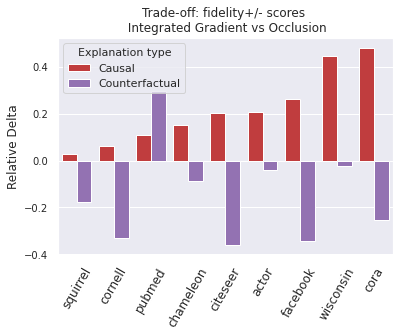

In [93]:
tidy = dfs[["dataset", "1-fidelity_acc-", "fidelity_acc+"]].melt(id_vars='dataset').rename(columns=str.title)
ax = sns.barplot(x='Dataset', y='Value', hue='Variable', data=tidy, palette=sns.color_palette("tab10")[3:])

plt.setp(ax.get_xticklabels(), rotation=60)
ax.set_title(f"Trade-off: fidelity+/- scores \n {title}")
# title
# check axes and find which is have legend
leg = ax.get_legend()
new_title = 'Explanation type'
leg.set_title(new_title)
# replace labels
new_labels = ["Causal", "Counterfactual"]
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
plt.xlabel("")
plt.ylabel("Relative Delta")
#plt.savefig('/cluster/home/kamara/Explain/figures/topk/trade-off_type_k_10_gradcam_vs_pagerank.pdf', bbox_inches='tight')
#plt.savefig('/cluster/home/kamara/Explain/figures/topk/trade-off_type_k_10_occlusion_vs_sa.pdf', bbox_inches='tight')
#plt.savefig('/cluster/home/kamara/Explain/figures/topk/trade-off_type_k_10_ig_vs_occlusion.pdf', bbox_inches='tight')

## Consistency

In [93]:
dfs = df_vs.groupby(["dataset", "explainer_name", "topk"]).mean().reset_index()
dfs

,dataset,explainer_name,topk,true_label_as_target,hard_mask,charact_acc,fidelity_acc+,1-fidelity_acc-,time
0,actor,gradcam,1.0,0.5,0.5,0.323620,0.2425,0.7175,0.00775
1,actor,gradcam,5.0,0.5,0.5,0.401557,0.2900,0.7975,0.00775
2,actor,gradcam,10.0,0.5,0.5,0.440413,0.3200,0.7900,0.00775
3,actor,gradcam,15.0,0.5,0.5,0.457090,0.3375,0.7850,0.00775
4,actor,gradcam,20.0,0.5,0.5,0.466857,0.3500,0.7725,0.00775
...,...,...,...,...,...,...,...,...,...
139,wisconsin,pagerank,15.0,0.5,0.5,0.562259,0.5000,0.8225,0.02725
140,wisconsin,pagerank,20.0,0.5,0.5,0.555852,0.5175,0.7975,0.02725
141,wisconsin,pagerank,25.0,0.5,0.5,0.571596,0.5325,0.8025,0.02725
142,wisconsin,pagerank,50.0,0.5,0.5,0.599401,0.5275,0.8900,0.02725


In [94]:
grads = []
dfs['consistency'] = pd.Series()

for data in datasets:
    for method in [expl1, expl2]:
        print(method, data)
        sample = dfs[(dfs.dataset==data)&(dfs.explainer_name==method)]
        grad = np.gradient(np.array(sample["charact_acc"]), np.array(sample["topk"])).mean()
        dfs['consistency'].loc[(dfs.dataset==data)&(dfs.explainer_name==method)] = grad

gradcam cora
pagerank cora
gradcam pubmed
pagerank pubmed
gradcam citeseer
pagerank citeseer
gradcam cornell
pagerank cornell
gradcam wisconsin
pagerank wisconsin
gradcam actor
pagerank actor
gradcam chameleon
pagerank chameleon
gradcam squirrel
pagerank squirrel
gradcam facebook
pagerank facebook


/tmp/ipykernel_8271/2071198281.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dfs['consistency'] = pd.Series()
/cluster/apps/nss/gcc-8.2.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [95]:
dfs

,dataset,explainer_name,topk,true_label_as_target,hard_mask,charact_acc,fidelity_acc+,1-fidelity_acc-,time,consistency
0,actor,gradcam,1.0,0.5,0.5,0.323620,0.2425,0.7175,0.00775,0.005285
1,actor,gradcam,5.0,0.5,0.5,0.401557,0.2900,0.7975,0.00775,0.005285
2,actor,gradcam,10.0,0.5,0.5,0.440413,0.3200,0.7900,0.00775,0.005285
3,actor,gradcam,15.0,0.5,0.5,0.457090,0.3375,0.7850,0.00775,0.005285
4,actor,gradcam,20.0,0.5,0.5,0.466857,0.3500,0.7725,0.00775,0.005285
...,...,...,...,...,...,...,...,...,...,...
139,wisconsin,pagerank,15.0,0.5,0.5,0.562259,0.5000,0.8225,0.02725,0.013294
140,wisconsin,pagerank,20.0,0.5,0.5,0.555852,0.5175,0.7975,0.02725,0.013294
141,wisconsin,pagerank,25.0,0.5,0.5,0.571596,0.5325,0.8025,0.02725,0.013294
142,wisconsin,pagerank,50.0,0.5,0.5,0.599401,0.5275,0.8900,0.02725,0.013294


In [96]:
dfs = dfs.groupby(["dataset", "explainer_name"]).mean()
dfs= dfs.diff().reset_index()
dfs = dfs[dfs.explainer_name==expl2]
dfs

,dataset,explainer_name,topk,true_label_as_target,hard_mask,charact_acc,fidelity_acc+,1-fidelity_acc-,time,consistency
1,actor,pagerank,0.0,0.0,0.0,-0.028317,-0.027188,-0.016563,0.980575,-0.003206
3,chameleon,pagerank,0.0,0.0,0.0,-0.021850,-0.027500,-0.005937,0.804125,-0.000959
5,citeseer,pagerank,0.0,0.0,0.0,0.118958,0.107812,0.008750,0.939825,0.006399
7,cora,pagerank,0.0,0.0,0.0,0.014706,0.009063,-0.013125,0.354725,0.000743
9,cornell,pagerank,0.0,0.0,0.0,-0.029436,-0.020625,-0.020937,0.016100,-0.002322
11,facebook,pagerank,0.0,0.0,0.0,-0.057477,-0.043750,-0.020625,2.825300,-0.003733
13,pubmed,pagerank,0.0,0.0,0.0,0.056341,0.060312,0.006563,1.662900,0.002220
15,squirrel,pagerank,0.0,0.0,0.0,-0.040473,-0.040312,-0.017813,3.593225,-0.002543
17,wisconsin,pagerank,0.0,0.0,0.0,-0.085274,-0.061250,-0.049687,0.021400,-0.005339


Text(0, 0.5, 'Relative Delta')

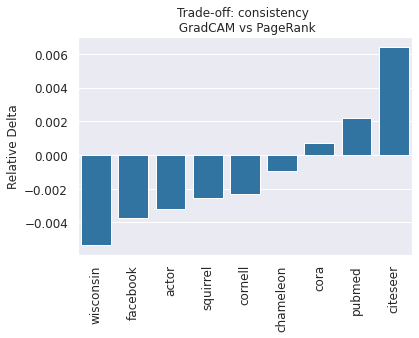

In [97]:
ax = sns.barplot(x="dataset", y="consistency", data=dfs.sort_values(by=["consistency"]),  color=pal_c[0])
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set_title(f"Trade-off: consistency \n {title}")
# title
plt.xlabel("")
plt.ylabel("Relative Delta")

## Synthetic

In [80]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/syn/topk'

jsonpath = f'/cluster/home/kamara/Explain/configs/syn/topk/config_syn_topk_1expe.json'
ranges = get_param_ranges(jsonpath)

df_res = pd.read_csv(os.path.join(dir, f'nc_syn_topk_1expe.csv'), index_col = 0)
res = df_res.groupby(by=['dataset', 'topk', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()

In [81]:
def explainer_type(row):
    if row['explainer_name'] in ['basic_gnnexplainer', 'gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx', 'pgexplainer'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa', 'ig', 'gradcam'] :
      return('gradient')
    return('baseline')

df_res['type'] = df_res.apply(lambda row: explainer_type(row), axis=1)

In [82]:
df_res["1-fidelity_acc-"] = 1- df_res["fidelity_acc-"]
df_res["1-fidelity_prob-"] = 1- df_res["fidelity_prob-"]
df_res['charact_prob'] = 2 * df_res['fidelity_prob+'] * (1-df_res['fidelity_prob-'])/ (df_res['fidelity_prob+']  + 1-df_res['fidelity_prob-'])
df_res['charact_acc'] = 2 * df_res['fidelity_acc+'] * (1-df_res['fidelity_acc-'])/ (df_res['fidelity_acc+']  + 1-df_res['fidelity_acc-'])


In [83]:
df_res["1-fidelity_gnn_acc-"] = 1- df_res["fidelity_gnn_acc-"]
df_res["1-fidelity_gnn_prob-"] = 1- df_res["fidelity_gnn_prob-"]
df_res['charact_gnn_prob'] = 2 * df_res['fidelity_gnn_prob+'] * (1-df_res['fidelity_gnn_prob-'])/ (df_res['fidelity_gnn_prob+']  + 1-df_res['fidelity_gnn_prob-'])
df_res['charact_gnn_acc'] = 2 * df_res['fidelity_gnn_acc+'] * (1-df_res['fidelity_gnn_acc-'])/ (df_res['fidelity_gnn_acc+']  + 1-df_res['fidelity_gnn_acc-'])


In [84]:
df_res = df_res.reset_index()
#df_res = df_res[df_res.explainer_name!="pgexplainer"]
df_res

,dataset,true_label_as_target,hard_mask,topk,explainer_name,num_test,fidelity_acc+,fidelity_acc-,fidelity_prob+,fidelity_prob-,...,number_of_edges,type,1-fidelity_acc-,1-fidelity_prob-,charact_prob,charact_acc,1-fidelity_gnn_acc-,1-fidelity_gnn_prob-,charact_gnn_prob,charact_gnn_acc
0,syn1,False,False,1.0,basic_gnnexplainer,100.0,-1.00,-1.00,-1.000000,-1.000000,...,4110.0,pertubation,2.00,2.000000,-4.000000,-4.000000,0.32,0.438530,0.070559,0.101053
1,syn1,False,False,1.0,distance,100.0,-1.00,-1.00,-1.000000,-1.000000,...,4110.0,baseline,2.00,2.000000,-4.000000,-4.000000,0.32,0.442950,0.162402,0.230400
2,syn1,False,False,1.0,ig,100.0,-1.00,-1.00,-1.000000,-1.000000,...,4110.0,gradient,2.00,2.000000,-4.000000,-4.000000,0.32,0.426547,0.236891,0.238431
3,syn1,False,False,1.0,occlusion,100.0,-1.00,-1.00,-1.000000,-1.000000,...,4110.0,pertubation,2.00,2.000000,-4.000000,-4.000000,0.32,0.446576,0.402944,0.374026
4,syn1,False,False,1.0,pagerank,100.0,-1.00,-1.00,-1.000000,-1.000000,...,4110.0,baseline,2.00,2.000000,-4.000000,-4.000000,0.32,0.412311,0.297901,0.343188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,syn6,True,True,100.0,pgexplainer,100.0,0.24,0.43,0.186025,0.388927,...,3948.0,pertubation,0.57,0.611073,0.285221,0.337778,2.00,2.000000,-4.000000,-4.000000
1276,syn6,True,True,100.0,pgmexplainer,100.0,0.67,0.06,0.547282,0.060046,...,3948.0,pertubation,0.94,0.939954,0.691780,0.782360,2.00,2.000000,-4.000000,-4.000000
1277,syn6,True,True,100.0,random,100.0,0.19,0.65,0.138319,0.545766,...,3948.0,baseline,0.35,0.454234,0.212063,0.246296,2.00,2.000000,-4.000000,-4.000000
1278,syn6,True,True,100.0,sa,100.0,0.56,0.65,0.384663,0.577091,...,3948.0,gradient,0.35,0.422909,0.402880,0.430769,2.00,2.000000,-4.000000,-4.000000


In [85]:
df_res.columns

Index(['dataset', 'true_label_as_target', 'hard_mask', 'topk',
       'explainer_name', 'num_test', 'fidelity_acc+', 'fidelity_acc-',
       'fidelity_prob+', 'fidelity_prob-', 'fidelity_gnn_acc+',
       'fidelity_gnn_acc-', 'fidelity_gnn_prob+', 'fidelity_gnn_prob-',
       'f1_score', 'precision', 'recall', 'mask_size_init',
       'mask_entropy_init', 'max_avg_init', 'mask_size_transf',
       'mask_entropy_transf', 'max_avg_transf', 'time', 'number_of_edges',
       'type', '1-fidelity_acc-', '1-fidelity_prob-', 'charact_prob',
       'charact_acc', '1-fidelity_gnn_acc-', '1-fidelity_gnn_prob-',
       'charact_gnn_prob', 'charact_gnn_acc'],
      dtype='object')

In [86]:
df_res.loc[df_res['true_label_as_target']==False, 'charact_prob'] = df_res['charact_gnn_prob']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_prob+'] = df_res['fidelity_gnn_prob+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_prob-"] = df_res["1-fidelity_gnn_prob-"]

df_res.loc[df_res['true_label_as_target']==False, 'charact_acc'] = df_res['charact_gnn_acc']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_acc+'] = df_res['fidelity_gnn_acc+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_acc-"] = df_res["1-fidelity_gnn_acc-"]


In [87]:
datasets = ["syn1", "syn4", "syn5", "syn6"]

In [88]:
df_res = df_res[df_res.dataset!="syn3"]

## Rank methods

In [89]:
# choose size of explanation
topk_val = 10

In [90]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]
dfc = pd.pivot_table(dfc, values=["charact_acc"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

charact_acc                               mean_rank  \
dataset                   syn1      syn4      syn5      syn6             
explainer_name                                                           
pagerank              0.739329  0.529827  0.585763  0.799157  0.663519   
subgraphx             0.464516  0.544352  0.551998  0.686335  0.561800   
pgmexplainer          0.503734  0.548998  0.551560  0.626811  0.557776   
occlusion             0.553846  0.463747  0.463200  0.334853  0.453912   
ig                    0.238431  0.510149  0.568297  0.415281  0.433039   
sa                    0.390244  0.497663  0.416583  0.412500  0.429247   
distance              0.422370  0.521855  0.414474  0.290132  0.412207   
basic_gnnexplainer    0.324911  0.487188  0.415642  0.255937  0.370920   
random                0.338824  0.431972  0.360000  0.249057  0.344963   
pgexplainer           0.023957  0.000000  0.000000  0.028348  0.013076   

                   final_rank  
dataset                        
explainer_name                 
pagerank                  1.0  
subgraphx                 2.0  
pgmexplainer              3.0  
occlusion                 4.0  
ig                        5.0  
sa                        6.0  
distance                  7.0  
basic_gnnexplainer        8.0  
random                    9.0  
pgexplainer              10.0

In [91]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]

dfc['Characterization'] = dfc.groupby('dataset')['charact_acc'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Characterization'])

dfc = pd.pivot_table(dfc, values=['Characterization'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Characterization                   mean_rank final_rank
dataset                        syn1  syn4  syn5  syn6                     
explainer_name                                                            
pagerank                        1.0   3.0   1.0   1.0      1.50        1.0
pgmexplainer                    3.0   1.0   4.0   3.0      2.75        2.5
subgraphx                       4.0   2.0   3.0   2.0      2.75        2.5
ig                              9.0   5.0   2.0   4.0      5.00        4.0
occlusion                       2.0   8.0   5.0   6.0      5.25        5.0
sa                              6.0   6.0   6.0   5.0      5.75        6.0
distance                        5.0   4.0   8.0   7.0      6.00        7.0
basic_gnnexplainer              8.0   7.0   7.0   8.0      7.50        8.0
random                          7.0   9.0   9.0   9.0      8.50        9.0
pgexplainer                    10.0  10.0  10.0  10.0     10.00       10.0

#### Counterfactual

In [92]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'fidelity_acc+']]

dfc = pd.pivot_table(dfc, values=['fidelity_acc+'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

fidelity_acc+                         mean_rank final_rank
dataset                     syn1    syn4    syn5    syn6                     
explainer_name                                                               
pagerank                  0.6800  0.4100  0.6400  0.6700  0.600000        1.0
subgraphx                 0.4800  0.4100  0.6200  0.6400  0.537500        2.0
pgmexplainer              0.5000  0.4200  0.6150  0.5550  0.522500        3.0
sa                        0.5000  0.4425  0.4950  0.5500  0.496875        4.0
ig                        0.1900  0.4400  0.6200  0.5600  0.452500        5.5
occlusion                 0.4500  0.3700  0.6500  0.3400  0.452500        5.5
distance                  0.4550  0.4200  0.5000  0.2400  0.403750        7.0
basic_gnnexplainer        0.3150  0.4050  0.4925  0.1975  0.352500        8.0
random                    0.3600  0.3425  0.3600  0.2000  0.315625        9.0
pgexplainer               0.0125  0.0000  0.0000  0.0150  0.006875       10.0

In [93]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "fidelity_acc+"]]

dfc['Counterfactual'] = dfc.groupby('dataset')['fidelity_acc+'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Counterfactual'])

dfc = pd.pivot_table(dfc, values=["Counterfactual"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Counterfactual                   mean_rank final_rank
dataset                      syn1  syn4  syn5  syn6                     
explainer_name                                                          
pagerank                      1.0   5.5   2.0   1.0     2.375        1.0
subgraphx                     4.0   5.5   3.5   2.0     3.750        2.0
pgmexplainer                  2.5   4.0   5.0   4.0     3.875        3.5
sa                            2.5   1.0   7.0   5.0     3.875        3.5
ig                            9.0   2.0   3.5   3.0     4.375        5.0
distance                      5.0   3.0   6.0   7.0     5.250        6.5
occlusion                     6.0   8.0   1.0   6.0     5.250        6.5
basic_gnnexplainer            8.0   7.0   8.0   9.0     8.000        8.0
random                        7.0   9.0   9.0   8.0     8.250        9.0
pgexplainer                  10.0  10.0  10.0  10.0    10.000       10.0

#### Causal

In [94]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", '1-fidelity_acc-']]

dfc = pd.pivot_table(dfc, values=['1-fidelity_acc-'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

1-fidelity_acc-                        mean_rank final_rank
dataset                       syn1    syn4    syn5   syn6                     
explainer_name                                                                
pagerank                    0.8100  0.7500  0.5400  0.990  0.772500        1.0
pgmexplainer                0.5100  0.7925  0.5000  0.720  0.630625        2.0
subgraphx                   0.4500  0.8100  0.4975  0.740  0.624375        3.0
occlusion                   0.7200  0.6225  0.3600  0.330  0.508125        4.0
distance                    0.3950  0.6950  0.3600  0.490  0.485000        5.0
ig                          0.3200  0.6075  0.5250  0.330  0.445625        6.0
basic_gnnexplainer          0.3375  0.6125  0.3600  0.365  0.418750        7.0
pgexplainer                 0.3200  0.5900  0.3600  0.340  0.402500        8.0
random                      0.3200  0.5850  0.3600  0.330  0.398750        9.0
sa                          0.3200  0.5700  0.3600  0.330  0.395000       10.0

In [95]:
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "1-fidelity_acc-"]]

dfc['Causal'] = dfc.groupby('dataset')['1-fidelity_acc-'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Causal'])

dfc = pd.pivot_table(dfc, values=["Causal"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Causal                 mean_rank final_rank
dataset              syn1  syn4 syn5 syn6                     
explainer_name                                                
pagerank              1.0   3.0  1.0  1.0     1.500        1.0
pgmexplainer          3.0   2.0  3.0  3.0     2.750        2.5
subgraphx             4.0   1.0  4.0  2.0     2.750        2.5
distance              5.0   4.0  7.5  4.0     5.125        4.0
occlusion             2.0   5.0  7.5  8.5     5.750        5.0
basic_gnnexplainer    6.0   6.0  7.5  5.0     6.125        6.0
ig                    8.5   7.0  2.0  8.5     6.500        7.0
pgexplainer           8.5   8.0  7.5  6.0     7.500        8.0
random                8.5   9.0  7.5  8.5     8.375        9.0
sa                    8.5  10.0  7.5  8.5     8.625       10.0

#### Phenomenon

In [96]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==True)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'charact_acc']]

dfc = pd.pivot_table(dfc, values=['charact_acc'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

charact_acc                               mean_rank  \
dataset                   syn1      syn4      syn5      syn6             
explainer_name                                                           
pagerank              0.739329  0.529827  0.585763  0.799157  0.663519   
subgraphx             0.464516  0.539833  0.553517  0.680584  0.559613   
pgmexplainer          0.503734  0.548410  0.549550  0.626811  0.557126   
occlusion             0.553846  0.459057  0.468326  0.330000  0.452807   
sa                    0.390244  0.493170  0.425455  0.412500  0.430342   
ig                    0.238431  0.505944  0.559886  0.415281  0.429886   
distance              0.422370  0.521855  0.414474  0.290132  0.412207   
basic_gnnexplainer    0.322500  0.492070  0.421714  0.259749  0.374008   
random                0.338824  0.432547  0.360000  0.249057  0.345107   
pgexplainer           0.028520  0.000000  0.000000  0.018889  0.011852   

                   final_rank  
dataset                        
explainer_name                 
pagerank                  1.0  
subgraphx                 2.0  
pgmexplainer              3.0  
occlusion                 4.0  
sa                        5.0  
ig                        6.0  
distance                  7.0  
basic_gnnexplainer        8.0  
random                    9.0  
pgexplainer              10.0

In [97]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==True)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]

dfc['Phenomenon'] = dfc.groupby('dataset')['charact_acc'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Phenomenon'])

dfc = pd.pivot_table(dfc, values=['Phenomenon'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Phenomenon                   mean_rank final_rank
dataset                  syn1  syn4  syn5  syn6                     
explainer_name                                                      
pagerank                  1.0   3.0   1.0   1.0      1.50        1.0
pgmexplainer              3.0   1.0   4.0   3.0      2.75        2.5
subgraphx                 4.0   2.0   3.0   2.0      2.75        2.5
ig                        9.0   5.0   2.0   4.0      5.00        4.0
occlusion                 2.0   8.0   5.0   6.0      5.25        5.0
sa                        6.0   6.0   6.0   5.0      5.75        6.0
distance                  5.0   4.0   8.0   7.0      6.00        7.0
basic_gnnexplainer        8.0   7.0   7.0   8.0      7.50        8.0
random                    7.0   9.0   9.0   9.0      8.50        9.0
pgexplainer              10.0  10.0  10.0  10.0     10.00       10.0

#### Model

In [98]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==False)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'charact_acc']]

dfc = pd.pivot_table(dfc, values=['charact_acc'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

charact_acc                               mean_rank  \
dataset                   syn1      syn4      syn5      syn6             
explainer_name                                                           
pagerank              0.739329  0.529827  0.585763  0.799157  0.663519   
subgraphx             0.464516  0.548871  0.550479  0.692086  0.563988   
pgmexplainer          0.503734  0.549585  0.553571  0.626811  0.558426   
occlusion             0.553846  0.468436  0.458075  0.339706  0.455016   
ig                    0.238431  0.514354  0.576707  0.415281  0.436193   
sa                    0.390244  0.502157  0.407711  0.412500  0.428153   
distance              0.422370  0.521855  0.414474  0.290132  0.412207   
basic_gnnexplainer    0.327323  0.482306  0.409570  0.252125  0.367831   
random                0.338824  0.431398  0.360000  0.249057  0.344819   
pgexplainer           0.019394  0.000000  0.000000  0.037808  0.014300   

                   final_rank  
dataset                        
explainer_name                 
pagerank                  1.0  
subgraphx                 2.0  
pgmexplainer              3.0  
occlusion                 4.0  
ig                        5.0  
sa                        6.0  
distance                  7.0  
basic_gnnexplainer        8.0  
random                    9.0  
pgexplainer              10.0

In [99]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==False)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]

dfc["Model"] = dfc.groupby('dataset')['charact_acc'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', "Model"])

dfc = pd.pivot_table(dfc, values=["Model"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Model                   mean_rank final_rank
dataset             syn1  syn4  syn5  syn6                     
explainer_name                                                 
pagerank             1.0   3.0   1.0   1.0      1.50        1.0
pgmexplainer         3.0   1.0   3.0   3.0      2.50        2.0
subgraphx            4.0   2.0   4.0   2.0      3.00        3.0
ig                   9.0   5.0   2.0   4.0      5.00        4.0
occlusion            2.0   8.0   5.0   6.0      5.25        5.0
distance             5.0   4.0   6.0   7.0      5.50        6.0
sa                   6.0   6.0   8.0   5.0      6.25        7.0
basic_gnnexplainer   8.0   7.0   7.0   8.0      7.50        8.0
random               7.0   9.0   9.0   9.0      8.50        9.0
pgexplainer         10.0  10.0  10.0  10.0     10.00       10.0

#### Accuracy

In [102]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==True)&(df_res.hard_mask==True)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'f1_score']]

dfc = pd.pivot_table(dfc, values=['f1_score'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=False)
dfc = dfc.sort_values(by=['mean_rank'], ascending=False)
dfc

f1_score                               mean_rank  \
dataset                 syn1      syn4      syn5      syn6             
explainer_name                                                         
pagerank            0.863636  0.326970  0.323529  0.804545  0.579670   
distance            0.779818  0.314139  0.376088  0.730975  0.550255   
subgraphx           0.703957  0.217063  0.324042  0.488508  0.433392   
pgmexplainer        0.562121  0.384545  0.314967  0.444121  0.426439   
basic_gnnexplainer  0.348991  0.305600  0.325072  0.226513  0.301544   
ig                  0.169091  0.342121  0.314902  0.051244  0.219339   
occlusion           0.157417  0.108499  0.196809  0.053905  0.129157   
sa                  0.172727  0.133054  0.000000  0.058018  0.090950   
pgexplainer         0.007273  0.000000  0.000000  0.008939  0.004053   
random              0.002583  0.003750  0.003636  0.001333  0.002826   

                   final_rank  
dataset                        
explainer_name                 
pagerank                  1.0  
distance                  2.0  
subgraphx                 3.0  
pgmexplainer              4.0  
basic_gnnexplainer        5.0  
ig                        6.0  
occlusion                 7.0  
sa                        8.0  
pgexplainer               9.0  
random                   10.0

In [104]:
dfs = df_res[(df_res.topk==topk_val)&(df_res.true_label_as_target==False)&(df_res.hard_mask==True)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", 'f1_score']]

dfc["Accuracy"] = dfc.groupby('dataset')['f1_score'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', "Accuracy"])

dfc = pd.pivot_table(dfc, values=["Accuracy"], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc.sort_values(by=['mean_rank'])

Accuracy                   mean_rank final_rank
dataset                syn1  syn4  syn5  syn6                     
explainer_name                                                    
pagerank                1.0   3.0   2.0   1.0      1.75        1.0
distance                2.0   4.0   1.0   2.0      2.25        2.0
pgmexplainer            4.0   1.0   5.0   4.0      3.50        3.0
subgraphx               3.0   6.0   3.0   3.0      3.75        4.0
basic_gnnexplainer      5.0   5.0   4.0   5.0      4.75        5.0
ig                      7.0   2.0   6.0   7.0      5.50        6.0
sa                      6.0   7.0   8.0   6.0      6.75        7.0
occlusion               8.0   8.0   7.0   8.0      7.75        8.0
pgexplainer             9.0  10.0  10.0   9.0      9.50        9.5
random                 10.0   9.0   9.0  10.0      9.50        9.5

## Compare Explainer 1 vs Explainer 2

In [140]:
df_res['dataset'] = df_res['dataset'].replace({"syn4": "syn2", "syn5": "syn3", "syn6": "syn4"})

In [190]:
expl1 = "pagerank"#"pgmexplainer"#"gnnexplainer"#"occlusion"
expl2 = "subgraphx"#"pagerank"#"sa"
title = "PageRank vs SubgraphX"#"PageRank vs PGMExplainer"#"PageRank vs SubgraphX"#"PGMExplainer vs SubgraphX"
#Always exlp2 - expl1

In [191]:
df_vs = df_res[(df_res.explainer_name==expl1)|(df_res.explainer_name==expl2)].groupby(["explainer_name", "dataset", 'true_label_as_target','hard_mask', 'topk']).mean()
df_vs = df_vs[["charact_acc", "fidelity_acc+", "1-fidelity_acc-", "f1_score", "time"]]
df_vs = df_vs.reset_index()
df_vs


,explainer_name,dataset,true_label_as_target,hard_mask,topk,charact_acc,fidelity_acc+,1-fidelity_acc-,f1_score,time
0,pagerank,syn1,False,False,1.0,0.343188,0.37,0.32,0.285714,0.0181
1,pagerank,syn1,False,False,5.0,0.566034,0.67,0.49,0.664444,0.0181
2,pagerank,syn1,False,False,10.0,0.739329,0.68,0.81,0.863636,0.0181
3,pagerank,syn1,False,False,15.0,0.739329,0.68,0.81,0.857143,0.0181
4,pagerank,syn1,False,False,20.0,0.739329,0.68,0.81,0.750000,0.0181
...,...,...,...,...,...,...,...,...,...,...
251,subgraphx,syn4,True,True,15.0,0.680584,0.63,0.74,0.488508,0.1467
252,subgraphx,syn4,True,True,20.0,0.680584,0.63,0.74,0.488508,0.1467
253,subgraphx,syn4,True,True,25.0,0.680584,0.63,0.74,0.488508,0.1467
254,subgraphx,syn4,True,True,50.0,0.680584,0.63,0.74,0.488508,0.1467


### Trade-off Phenomenon vs Model

In [192]:
#dfs = df_vs[(df_vs.true_label_as_target==True)].groupby(["dataset", "explainer_name"]).mean()
dfs = df_vs.groupby(["true_label_as_target", "dataset", "explainer_name"]).mean()

In [193]:
dfs= dfs.diff().reset_index()
dfs = dfs[dfs.explainer_name==expl2]

In [194]:
dfs = dfs.sort_values(by='charact_acc')

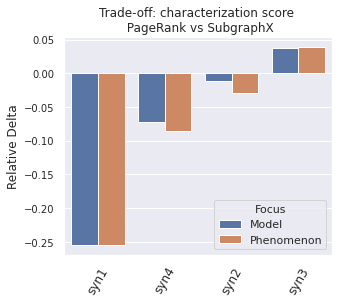

In [195]:
ax = sns.barplot(x="dataset", y="charact_acc", data=dfs, hue = "true_label_as_target")
plt.setp(ax.get_xticklabels(), rotation=60)
ax.set_title(f"Trade-off: characterization score \n {title}")
# title
# check axes and find which is have legend
leg = ax.get_legend()
new_title = 'Focus'
leg.set_title(new_title)
# replace labels
new_labels = ["Model", "Phenomenon"]
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("")
plt.ylabel("Relative Delta")
ax.set_box_aspect(6.5/len(ax.patches))
#plt.savefig('/cluster/home/kamara/Explain/figures/syn/trade-off_charact_k_10_pgmexplainer_vs_subgraphx_syn.pdf', bbox_inches='tight')
plt.savefig('/cluster/home/kamara/Explain/figures/syn/trade-off_charact_k_10_pagerank_vs_subgraphx_syn.pdf', bbox_inches='tight')
#plt.savefig('/cluster/home/kamara/Explain/figures/syn/trade-off_charact_k_10_pagerank_vs_pgmexplainer_syn.pdf', bbox_inches='tight')


### Trade-off Counterfactual vs Causal

In [184]:
#dfs = df_vs[(df_vs.true_label_as_target==True)].groupby(["dataset", "explainer_name"]).mean()
dfs = df_vs.groupby(["dataset", "explainer_name"]).mean()
#dfs = dfs["charact_acc"]
dfs

true_label_as_target  hard_mask   topk  charact_acc  \
dataset explainer_name                                                        
syn1    pagerank                         0.5        0.5  28.25     0.689055   
        pgmexplainer                     0.5        0.5  28.25     0.530571   
syn2    pagerank                         0.5        0.5  28.25     0.525229   
        pgmexplainer                     0.5        0.5  28.25     0.524328   
syn3    pagerank                         0.5        0.5  28.25     0.530290   
        pgmexplainer                     0.5        0.5  28.25     0.573993   
syn4    pagerank                         0.5        0.5  28.25     0.709581   
        pgmexplainer                     0.5        0.5  28.25     0.615449   

                        fidelity_acc+  1-fidelity_acc-  f1_score      time  
dataset explainer_name                                                      
syn1    pagerank             0.640000         0.765000  0.581737  0.019400  
        pgmexplainer         0.504375         0.577500  0.404725  5.053800  
syn2    pagerank             0.395000         0.791250  0.236129  0.012700  
        pgmexplainer         0.390625         0.801875  0.290711  4.522875  
syn3    pagerank             0.565625         0.541875  0.328756  0.022350  
        pgmexplainer         0.555625         0.629375  0.347759  7.373350  
syn4    pagerank             0.601250         0.868125  0.539504  0.018600  
        pgmexplainer         0.535625         0.735000  0.324754  4.187025

In [185]:
dfs= dfs.diff().reset_index()
dfs = dfs[dfs.explainer_name==expl2]
dfs = dfs.sort_values(by=["1-fidelity_acc-", "fidelity_acc+"])

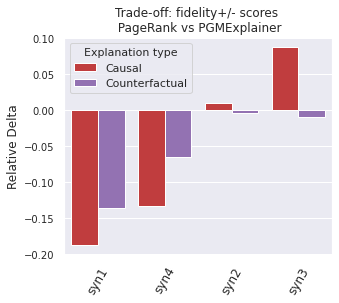

In [186]:
tidy = dfs[["dataset", "1-fidelity_acc-", "fidelity_acc+"]].melt(id_vars='dataset').rename(columns=str.title)
ax = sns.barplot(x='Dataset', y='Value', hue='Variable', data=tidy, palette=sns.color_palette("tab10")[3:])

plt.setp(ax.get_xticklabels(), rotation=60)
ax.set_title(f"Trade-off: fidelity+/- scores \n {title}")
# title
# check axes and find which is have legend
leg = ax.get_legend()
new_title = 'Explanation type'
leg.set_title(new_title)
# replace labels
new_labels = ["Causal", "Counterfactual"]
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
plt.xlabel("")
plt.ylabel("Relative Delta")
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_box_aspect(6.5/len(ax.patches)) #change 10 to modify the y/x axis ratio
#plt.savefig('/cluster/home/kamara/Explain/figures/syn/trade-off_type_k_10_pgmexplainer_vs_subgraphx_syn.pdf', bbox_inches='tight')
#plt.savefig('/cluster/home/kamara/Explain/figures/syn/trade-off_type_k_10_pagerank_vs_subgraphx_syn.pdf', bbox_inches='tight')
plt.savefig('/cluster/home/kamara/Explain/figures/syn/trade-off_type_k_10_pagerank_vs_pgmexplainer_syn.pdf', bbox_inches='tight')


### Accuracy

In [187]:
dfs = df_vs.groupby(["dataset", "explainer_name", "topk"]).mean().reset_index()
dfs

,dataset,explainer_name,topk,true_label_as_target,hard_mask,charact_acc,fidelity_acc+,1-fidelity_acc-,f1_score,time
0,syn1,pagerank,1.0,0.5,0.5,0.343188,0.370,0.32,0.285714,0.019400
1,syn1,pagerank,5.0,0.5,0.5,0.566034,0.670,0.49,0.664444,0.019400
2,syn1,pagerank,10.0,0.5,0.5,0.739329,0.680,0.81,0.863636,0.019400
3,syn1,pagerank,15.0,0.5,0.5,0.772778,0.680,0.90,0.857143,0.019400
4,syn1,pagerank,20.0,0.5,0.5,0.772778,0.680,0.90,0.750000,0.019400
...,...,...,...,...,...,...,...,...,...,...
59,syn4,pgmexplainer,15.0,0.5,0.5,0.647699,0.570,0.75,0.420184,4.187025
60,syn4,pgmexplainer,20.0,0.5,0.5,0.688956,0.605,0.80,0.397966,4.187025
61,syn4,pgmexplainer,25.0,0.5,0.5,0.694752,0.620,0.79,0.363081,4.187025
62,syn4,pgmexplainer,50.0,0.5,0.5,0.740373,0.650,0.86,0.236557,4.187025


In [188]:
dfs = dfs.groupby(["dataset", "explainer_name"]).mean()
dfs= dfs.diff().reset_index()
dfs = dfs[dfs.explainer_name==expl2]
dfs

,dataset,explainer_name,topk,true_label_as_target,hard_mask,charact_acc,fidelity_acc+,1-fidelity_acc-,f1_score,time
1,syn1,pgmexplainer,0.0,0.0,0.0,-0.158484,-0.135625,-0.187500,-0.177012,5.034400
3,syn2,pgmexplainer,0.0,0.0,0.0,-0.000901,-0.004375,0.010625,0.054582,4.510175
5,syn3,pgmexplainer,0.0,0.0,0.0,0.043703,-0.010000,0.087500,0.019004,7.351000
7,syn4,pgmexplainer,0.0,0.0,0.0,-0.094131,-0.065625,-0.133125,-0.214751,4.168425


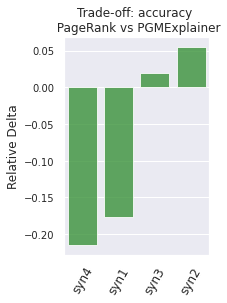

In [189]:
ax = sns.barplot(x="dataset", y="f1_score", data=dfs.sort_values(by=["f1_score"]), color=pal_c[2], alpha=0.8)
plt.setp(ax.get_xticklabels(), rotation=60)
ax.set_title(f"Trade-off: accuracy \n {title}")
# title
plt.xlabel("")
plt.ylabel("Relative Delta")
ax.set_box_aspect(6/len(ax.patches))
#plt.savefig('/cluster/home/kamara/Explain/figures/syn/trade-off_accuracy_k_10_pgmexplainer_vs_subgraphx_syn.pdf', bbox_inches='tight')
#plt.savefig('/cluster/home/kamara/Explain/figures/syn/trade-off_accuracy_k_10_pagerank_vs_subgraphx_syn.pdf', bbox_inches='tight')
plt.savefig('/cluster/home/kamara/Explain/figures/syn/trade-off_accuracy_k_10_pagerank_vs_pgmexplainer_syn.pdf', bbox_inches='tight')
